**IMPORT**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import poisson
from scipy.stats import loggamma

**DADOS QUESTÃO 1**

In [2]:
dados = pd.DataFrame({'x':np.array([[0]*4,[1]*4,[2]*4,[3]*4]).flatten(),
                      'y':list(range(4))*4,
                      'P(X,Y)':[0.05, 0.025, 0.075, 0.1, 0.13, 0.09, 0.15, 0.022, 0.03, 0.046, 0.11, 0.015, 0.010, 0.094, 0.005, 0.048]
                     })
dados

,x,y,"P(X,Y)"
0,0,0,0.050
1,0,1,0.025
2,0,2,0.075
3,0,3,0.100
4,1,0,0.130
5,1,1,0.090
6,1,2,0.150
7,1,3,0.022
8,2,0,0.030
9,2,1,0.046


**QUESTÃO 1 - A) função para calcular a distribuição de probabilidades**

In [3]:
def distribuicao(v, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob = []
    valores = df[v].unique()
    for valor in valores:
        prob.append(df[df[v] == valor][p].sum())
    return prob

distribuicao('x', 'P(X,Y)', dados)

[0.25, 0.392, 0.201, 0.157]

**B) função para calcular a distribuição de probabilidade condicional P(Y|X = x) para x = 1**

In [4]:
def condicional(v1, v2, b, p, df):
    # v1 = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # v2 = string representando o nome da coluna da variável cujo valor será fixado
    # b = valor fixo da variável v2
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob = []
    for valor in df[v1].unique():
        prob_condicional = df[(df[v2] == b) & (df[v1] == valor)][p].sum() / df[df[v2] == b][p].sum()
        prob.append(prob_condicional)
    return prob

condicional('x', 'y', 1, 'P(X,Y)', dados)

[0.09803921568627451,
 0.3529411764705882,
 0.1803921568627451,
 0.3686274509803921]

**C) função que retorne a probabilidade de uma das variáveis ser maior P(X > 1)**

In [5]:
def probabilidade_maior_que(v, a, p, df):
    # v = string representando o nome da coluna da variável que se deseja calcular as probabilidades
    # a = valor ao qual a variável v deve ser superior
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob = df[df[v] > a][p].sum()
    return prob

probabilidade_maior_que('x', 1, 'P(X,Y)', dados)

0.358

**QUESTÃO 2 - A) retorne True caso as variáveis x e y sejam dependentes ou False caso contrário**

In [6]:
def dependentes(v1, v2, p, df):
    # v1 = string representando o nome da coluna da primeira variável que se deseja verificar (in)dependência
    # v2 = string representando o nome da coluna da segunda variável que se deseja verificar (in)dependência
    # p = string representando o nome da coluna das probabilidades
    # df = dataframe contendo o conjunto de dados

    prob_v1 = df.groupby(v1)[p].sum()
    prob_v2 = df.groupby(v2)[p].sum()
    prob_conjunta = df.groupby([v1, v2])[p].sum()

    for idx, valor in prob_conjunta.items():
        x, y = idx
        if valor != prob_v1[x] * prob_v2[y]:
            return False
    return True

dependentes('x', 'y', 'P(X,Y)', dados)

False

**B) verifique se os pares de variáveis (x,y), (y,z) e (x,z) são independentes no conjunto de dados d2**

In [7]:
d2 = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/Q2.csv', index_col=0)

resultado_xy = dependentes('x', 'y', 'P(X,Y,Z)', d2)
resultado_yz = dependentes('y', 'z', 'P(X,Y,Z)', d2)
resultado_xz = dependentes('x', 'z', 'P(X,Y,Z)', d2)

print(f'Independência x y é {resultado_xy}')
print(f'Independência y z é {resultado_yz}')
print(f'Independência x z é {resultado_xz}')



Independência x y é False
Independência y z é False
Independência x z é False


**QUESTÃO 3 - A) distribuição de poisson (2, 5) e função de distribuição acumulada**

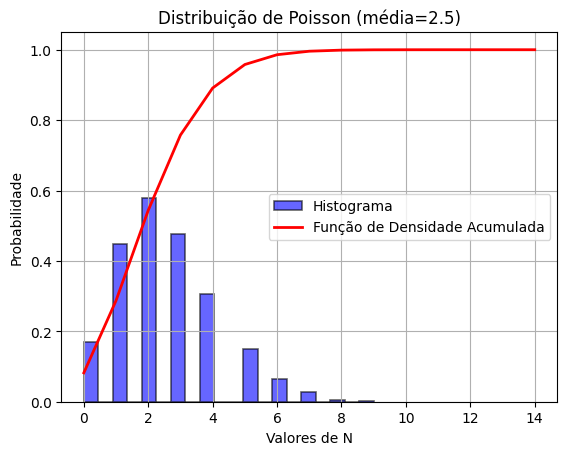

In [8]:
N = poisson.rvs(mu=2.5, size=1000)

# HISTOGRAMA
plt.hist(N, bins=20, density=True, alpha=0.6, color='b', edgecolor='black', linewidth=1.2, label='Histograma')

# função de densidade acumulada
x = np.arange(0, 15)
plt.plot(x, poisson.cdf(x, mu=2.5), color='r', linewidth=2, label='Função de Densidade Acumulada')

plt.xlabel('Valores de N')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson (média=2.5)')
plt.legend()
plt.grid(True)
plt.show()

**B) distribuição log gamma (contínua), com 4 graus de liberdade**

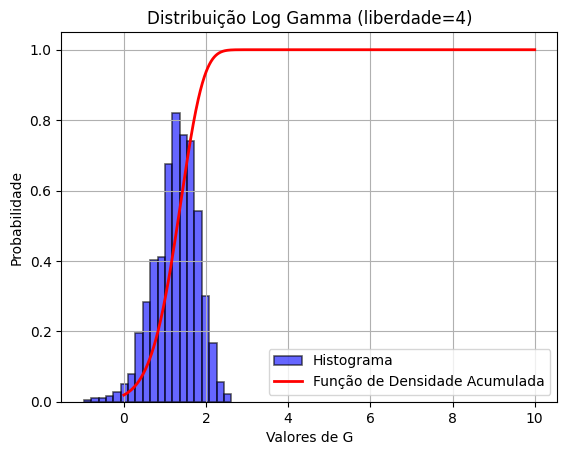

In [9]:
G = loggamma.rvs(c=4, size=1000)

# histograma
plt.hist(G, bins=20, density=True, alpha=0.6, color='b', edgecolor='black', linewidth=1.2, label='Histograma')

# função de densidade acumulada
x = np.linspace(0, 10, 1000)
plt.plot(x, loggamma.cdf(x, c=4), color='r', linewidth=2, label='Função de Densidade Acumulada')

plt.xlabel('Valores de G')
plt.ylabel('Probabilidade')
plt.title('Distribuição Log Gamma (liberdade=4)')
plt.legend()
plt.grid(True)
plt.show()


**DADOS DESAFIO**

In [10]:
heart = pd.read_csv('https://raw.githubusercontent.com/fccarvalho2/Viz/main/heart_disease_kaggle.csv')

**A) um entrevistado ter sofrido ataque cardíaco ou possuir doença cardiaca (HeartDiseaseorAttack = 1)**

In [11]:
p = heart['HeartDiseaseorAttack'].mean()

print(f"A probabilidade de um entrevistado ter sofrido ataque cardíaco ou possuir doença cardíaca é de: {p}")

A probabilidade de um entrevistado ter sofrido ataque cardíaco ou possuir doença cardíaca é de: 0.09418558814254178


**B) um fumante (smoker = 1) ter sofrido ataque cardíaco ou possuir doença cardíaca? E para um não fumante?**

In [12]:
# fumantes
probabilidade_fumante = heart[heart['Smoker'] == 1]['HeartDiseaseorAttack'].mean()

# não fumantes
probabilidade_nao_fumante = heart[heart['Smoker'] == 0]['HeartDiseaseorAttack'].mean()

print(f"A probabilidade de um fumante ter sofrido ataque cardíaco ou possuir doença cardíaca é de: {probabilidade_fumante}")
print(f"A probabilidade de um não fumante ter sofrido ataque cardíaco ou possuir doença cardíaca é de: {probabilidade_nao_fumante}")

A probabilidade de um fumante ter sofrido ataque cardíaco ou possuir doença cardíaca é de: 0.13165455467297618
A probabilidade de um não fumante ter sofrido ataque cardíaco ou possuir doença cardíaca é de: 0.06436495182539627


**C) um entrevistado que não faz atividade física e não come frutas regularmente (PhysActivity = 0 e Fruits = 0, respectivamente) ser cardíaco?**

In [13]:
probabilidade_ativ_frutas = heart[(heart['PhysActivity'] == 0) & (heart['Fruits'] == 0)]['HeartDiseaseorAttack'].mean()

print(f"A probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente ser cardíaco é de: {probabilidade_ativ_frutas}")

A probabilidade de um entrevistado que não faz atividade física e não come frutas regularmente ser cardíaco é de: 0.1366628981844783


**D) um entrevistado com obesidade (BMI >= 30.0) ser cardíaco?**

In [14]:
probabilidade_obesidade = heart[heart['BMI'] >= 30.0]['HeartDiseaseorAttack'].mean()

print(f"A probabilidade de um entrevistado com obesidade ser cardíaco é de: {probabilidade_obesidade}")

A probabilidade de um entrevistado com obesidade ser cardíaco é de: 0.11529749234499323


**E) qual dos fatores de risco analisados mais contribui para risco de desenvolver doenças cardíacas ou infarto?**

In [15]:
maior_probabilidade = max(probabilidade_fumante, probabilidade_nao_fumante, probabilidade_ativ_frutas, probabilidade_obesidade)
fator_de_risco = ""

if maior_probabilidade == probabilidade_fumante:
    fator_de_risco = "ser fumante"
elif maior_probabilidade == probabilidade_nao_fumante:
    fator_de_risco = "não ser fumante"
elif maior_probabilidade == probabilidade_ativ_frutas:
    fator_de_risco = "não fazer atividade física e não comer frutas regularmente"
elif maior_probabilidade == probabilidade_obesidade:
    fator_de_risco = "ter obesidade"

print(f"O fator de risco com maior influência no desenvolvimento de doenças cardíacas ou infarto é: {fator_de_risco}")

O fator de risco com maior influência no desenvolvimento de doenças cardíacas ou infarto é: não fazer atividade física e não comer frutas regularmente
